In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
arr = []
for i in range(1, 32):
    day = pd.read_csv('./data/dds_ch2_nyt/nyt' + str(i) + '.csv')
    day['Day'] = i
    arr.append(day)
d = pd.concat(arr)
df = d.copy()
bins = [-1, 0, 18, 25, 35, 45, 55, 65, float('inf')]  # Age group boundaries
labels = ['N', '<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Labels for age groups

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

df_s = df[df['Signed_In'] == 1]
df_u = df[df['Signed_In'] == 0]

df_s = df_s.drop('Signed_In', axis=1)

print(df)
print(df_s)

        Age  Gender  Impressions  Clicks  Signed_In  Day age_group
0        36       0            3       0          1    1     35-44
1        73       1            3       0          1    1       65+
2        30       0            3       0          1    1     25-34
3        49       1            3       0          1    1     45-54
4        47       1           11       0          1    1     45-54
...     ...     ...          ...     ...        ...  ...       ...
440107   41       1            4       0          1   31     35-44
440108    0       0            5       0          0   31         N
440109   22       1            3       0          1   31     18-24
440110   59       0            5       1          1   31     55-64
440111   29       1            4       0          1   31     25-34

[14905865 rows x 7 columns]
        Age  Gender  Impressions  Clicks  Day age_group
0        36       0            3       0    1     35-44
1        73       1            3       0    1       65+

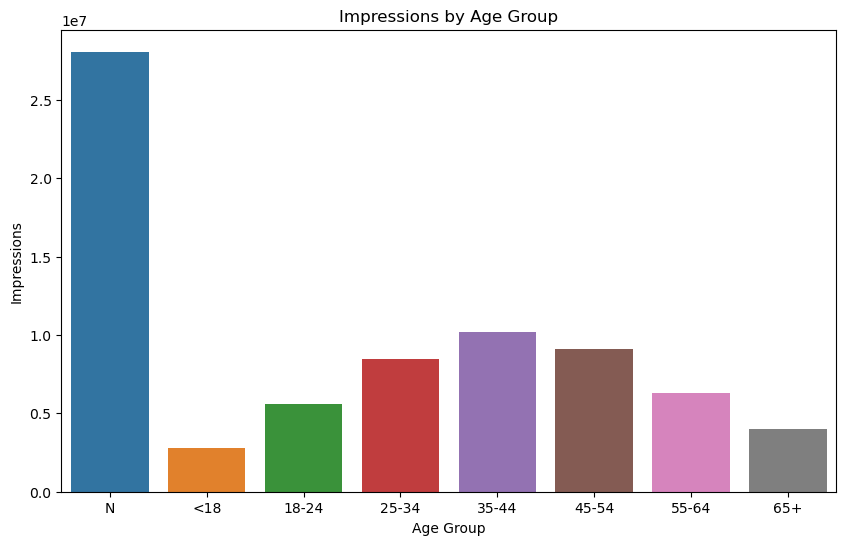

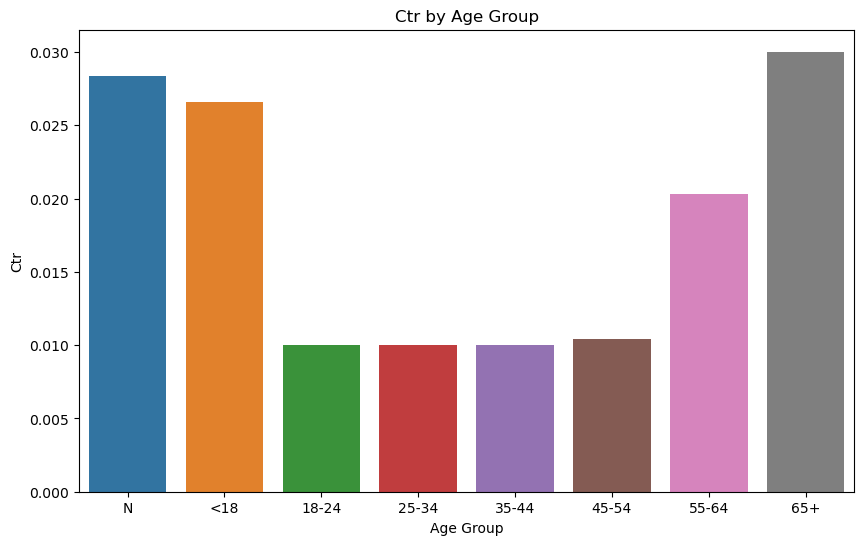

In [3]:
def plot_age_group_data(data, plot_type):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='age_group', y=plot_type, data=data)
    plt.title(f'{plot_type.capitalize()} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel(plot_type.capitalize())
    plt.show()

age_group_data = df.groupby('age_group').agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
age_group_data['CTR'] = age_group_data['Clicks'] / age_group_data['Impressions']

plot_age_group_data(age_group_data, 'Impressions')
plot_age_group_data(age_group_data, 'CTR')


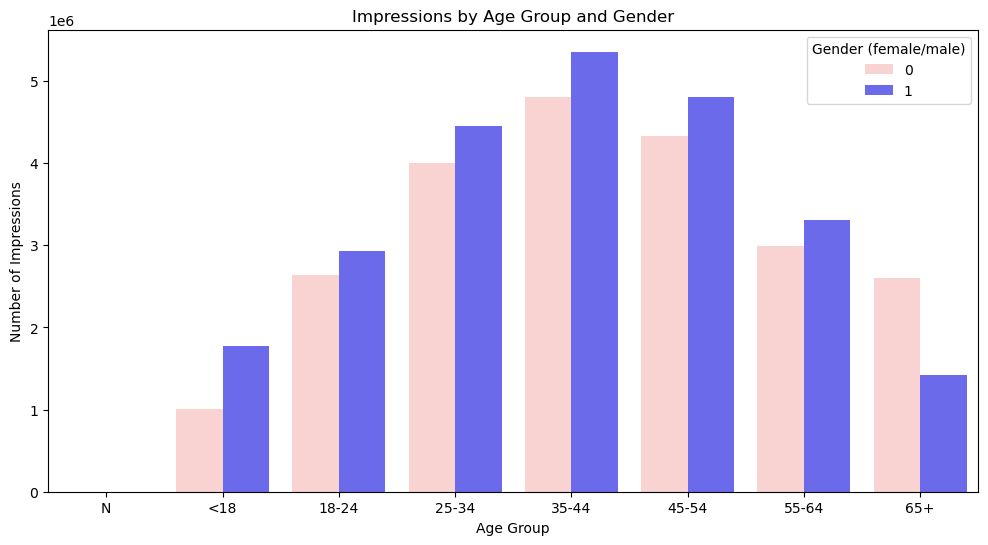

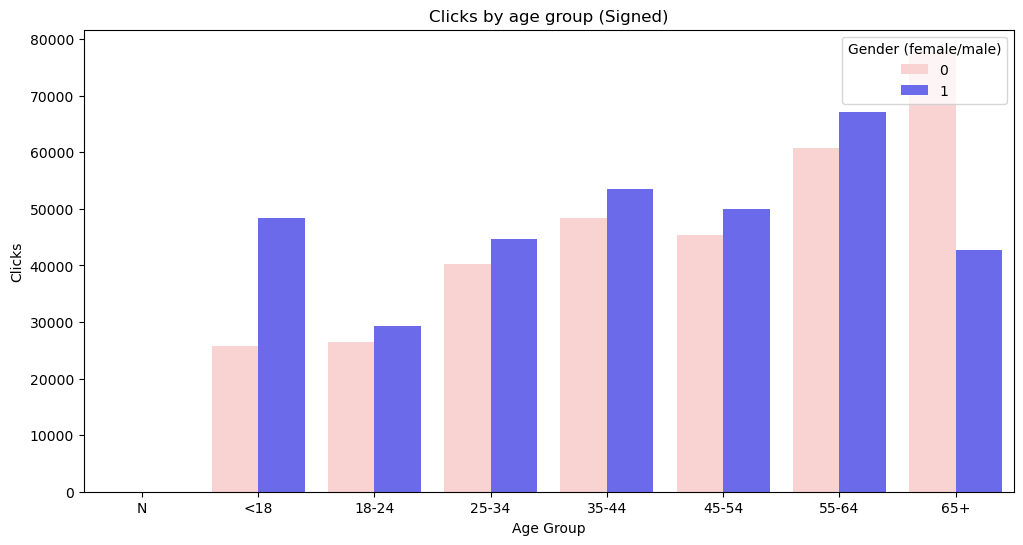

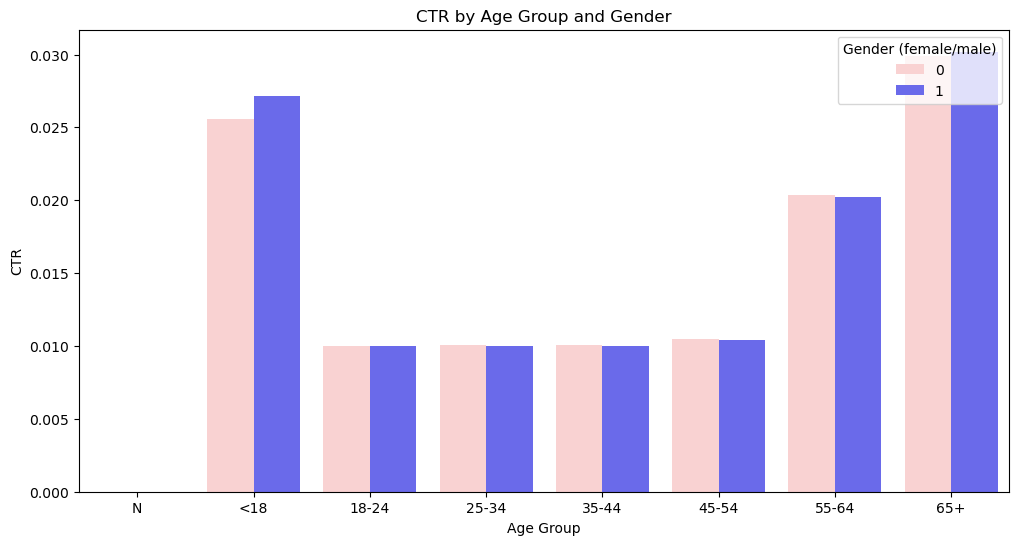

In [5]:
def plot_grouped_data(data, x, y, hue, plot_title, x_label, y_label, legend_title):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x, y=y, hue=hue, data=data, palette=['#fcc', '#55f'])
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title=legend_title, loc='upper right')
    plt.show()

days_signed = df_s.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
days_signed['CTR'] = days_signed['Clicks'] / days_signed['Impressions']

clicks_amount = df_s.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()

plot_grouped_data(days_signed, 'age_group', 'Impressions', 'Gender', 'Impressions by Age Group and Gender',
                  'Age Group', 'Number of Impressions', 'Gender (female/male)')

plot_grouped_data(clicks_amount, 'age_group', 'Clicks', 'Gender', 'Clicks by age group (Signed)',
                  'Age Group', 'Clicks', 'Gender (female/male)')

plot_grouped_data(days_signed, 'age_group', 'CTR', 'Gender', 'CTR by Age Group and Gender',
                  'Age Group', 'CTR', 'Gender (female/male)')


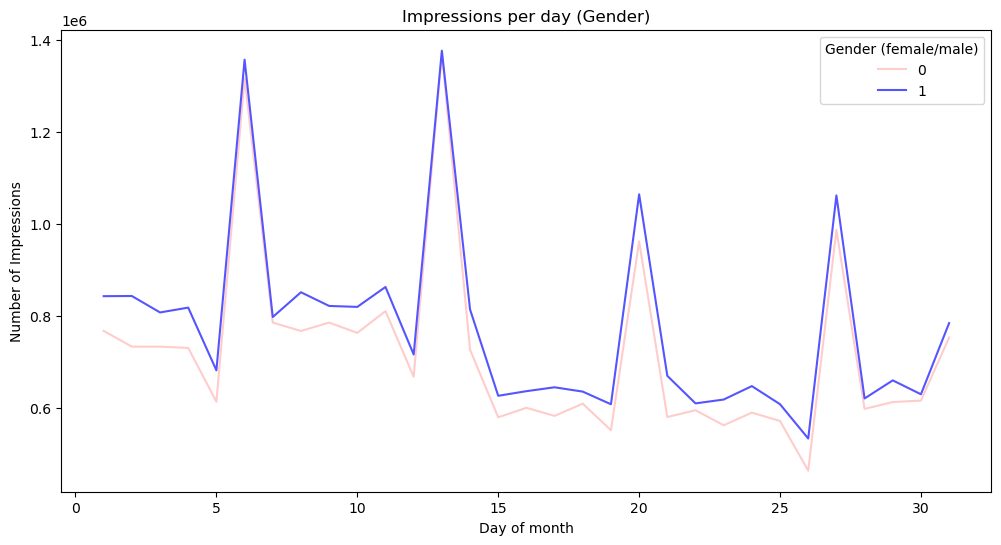

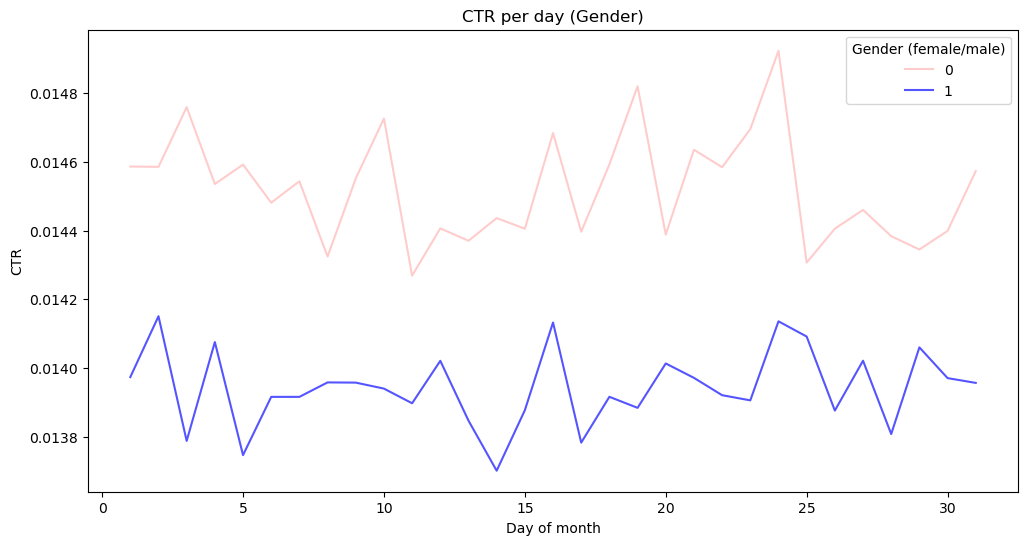

In [6]:
def plot_line_graph(data, x, y, hue, plot_title, x_label, y_label, legend_title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=x, y=y, hue=hue, data=data, palette=['#fcc', '#55f'])
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title=legend_title, loc='upper right')
    plt.show()

days_gender = df_s.groupby(['Day', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
days_gender['CTR'] = days_gender['Clicks'] / days_gender['Impressions']

plot_line_graph(days_gender, 'Day', 'Impressions', 'Gender', 'Impressions per day (Gender)',
                'Day of month', 'Number of Impressions', 'Gender (female/male)')

plot_line_graph(days_gender, 'Day', 'CTR', 'Gender', 'CTR per day (Gender)',
                'Day of month', 'CTR', 'Gender (female/male)')


In [7]:
def get_label(i):
    return 'Female' if i == 0 else 'Male'

# Grouping and aggregating metrics
grouped_metrics = df.groupby(['age_group', 'Gender']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Signed_In': 'sum'
})

grouped_metrics['CTR'] = grouped_metrics['Clicks'] / grouped_metrics['Impressions']

# Creating a pivot table for Impressions, Clicks, CTR, and Signed_In by Gender
pivot_df = grouped_metrics.pivot_table(index='age_group', columns='Gender', values=['Impressions', 'Clicks', 'CTR', 'Signed_In'])

# Renaming columns using get_label function
pivot_df.columns = [f'{col[0]}_{get_label(col[1])}' for col in pivot_df.columns]

# Resetting the index to make age_group a regular column
pivot_df.reset_index(inplace=True)

pivot_df


,age_group,CTR_Female,CTR_Male,Clicks_Female,Clicks_Male,Impressions_Female,Impressions_Male,Signed_In_Female,Signed_In_Male
0,N,0.028369,NaN,796448,0,28074662,0,0,0
1,<18,0.025578,0.027179,25810,48363,1009067,1779404,201247,355741
2,18-24,0.010014,0.009987,26444,29309,2640764,2934753,528143,587137
3,25-34,0.010044,0.010012,40253,44611,4007824,4455894,801943,891931
4,35-44,0.010049,0.009978,48343,53446,4810547,5356587,962315,1072052
5,45-54,0.010494,0.010386,45439,49933,4330035,4807768,866552,961996
6,55-64,0.020346,0.020243,60747,67084,2985676,3313891,596950,663591
7,65+,0.029927,0.030192,77767,42771,2598565,1416631,519432,283225


In [8]:
days = df.groupby(['Day', 'age_group']).size().reset_index(name='User Count').sort_values('Day')
print(days)

     Day age_group  User Count
0      1         N      137106
1      1       <18       19252
2      1     18-24       38530
3      1     25-34       58846
4      1     35-44       70573
..   ...       ...         ...
246   31     55-64       41892
241   31       <18       18299
240   31         N      132318
242   31     18-24       36929
247   31       65+       26607

[248 rows x 3 columns]


In [9]:
grouped_data = df.groupby('age_group')

age_group_summary = grouped_data[['Impressions', 'Clicks']].agg(['mean', 'median', 'size'])
variance_df = grouped_data[['Impressions', 'Clicks']].var()

print('\nAge Group Summary\n', age_group_summary)
print('\nVariance\n', variance_df)


Age Group Summary
           Impressions                    Clicks                
                 mean median     size      mean median     size
age_group                                                      
N            5.001178    5.0  5613610  0.141878    0.0  5613610
<18          5.006339    5.0   556988  0.133168    0.0   556988
18-24        4.999208    5.0  1115280  0.049990    0.0  1115280
25-34        4.996663    5.0  1693874  0.050101    0.0  1693874
35-44        4.997689    5.0  2034367  0.050035    0.0  2034367
45-54        4.997300    5.0  1828548  0.052157    0.0  1828548
55-64        4.997511    5.0  1260541  0.101410    0.0  1260541
65+          5.002381    5.0   802657  0.150174    0.0   802657

Variance
            Impressions    Clicks
age_group                       
N             5.003981  0.147301
<18           5.019357  0.134620
18-24         5.003437  0.050120
25-34         4.997274  0.050079
35-44         4.991887  0.049971
45-54         4.992517  0.052357
5

In [10]:
user_counts = df['age_group'].value_counts()
total_users = len(df)
proportions = user_counts / total_users

print('Users Proportions')
print(proportions)

Users Proportions
age_group
N        0.376604
35-44    0.136481
45-54    0.122673
25-34    0.113638
55-64    0.084567
18-24    0.074822
65+      0.053848
<18      0.037367
Name: count, dtype: float64


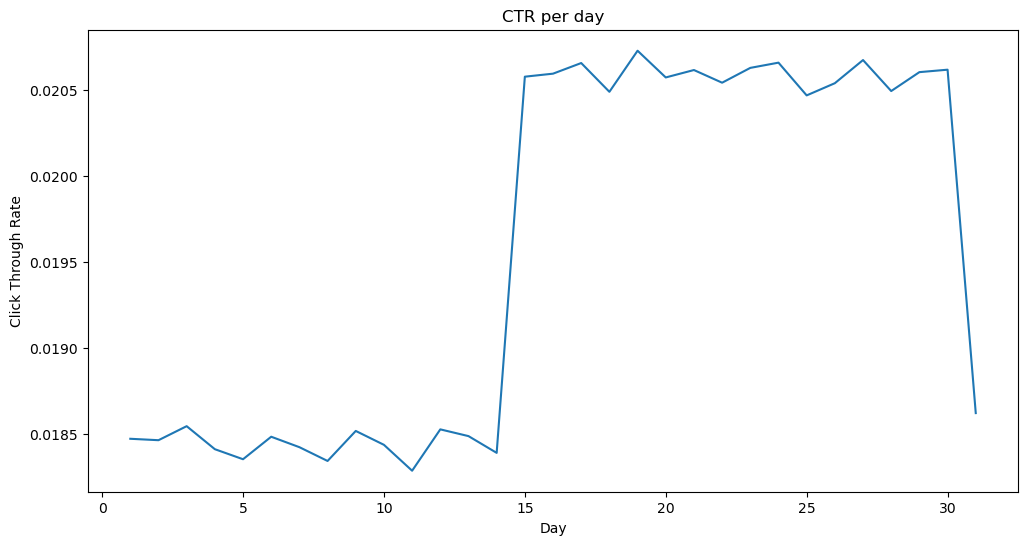

In [11]:
df['CTR'] = df['Clicks'] / df['Impressions']
grouped_data = df.groupby('Day')['CTR'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='CTR', data=grouped_data)
plt.title('CTR per day')
plt.xlabel('Day')
plt.ylabel('Click Through Rate')
plt.show()